# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | tobi village
City not found. Skipping...
Processing Record 3 of Set 1 | dudinka
Processing Record 4 of Set 1 | kumylzhenskaya
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | manokwari
Processing Record 8 of Set 1 | nha trang
Processing Record 9 of Set 1 | aqadyr
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | funafuti
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | sainte-anne-des-monts
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | palu
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 

Processing Record 39 of Set 4 | utrik
Processing Record 40 of Set 4 | al 'amarah
Processing Record 41 of Set 4 | prado
Processing Record 42 of Set 4 | ordubad
Processing Record 43 of Set 4 | envira
Processing Record 44 of Set 4 | wigton
Processing Record 45 of Set 4 | teshi old town
Processing Record 46 of Set 4 | trujillo
Processing Record 47 of Set 4 | kodinsk
Processing Record 48 of Set 4 | sinabang
Processing Record 49 of Set 4 | luorong
Processing Record 0 of Set 5 | labasa
Processing Record 1 of Set 5 | port alfred
Processing Record 2 of Set 5 | praya
Processing Record 3 of Set 5 | belmonte
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | shantobe
Processing Record 6 of Set 5 | podgornoye
Processing Record 7 of Set 5 | new norfolk
Processing Record 8 of Set 5 | medicine hat
Processing Record 9 of Set 5 | batyrevo
Processing Record 10 of Set 5 | nguigmi
Processing Record 11 of Set 5 | pisco
Processing Record 12 of Set 5 | jayapura
Processing Record 13 of Set 

Processing Record 29 of Set 8 | hidden valley
Processing Record 30 of Set 8 | sirte
Processing Record 31 of Set 8 | plastun
Processing Record 32 of Set 8 | ad dawadimi
Processing Record 33 of Set 8 | daru
Processing Record 34 of Set 8 | kargasok
Processing Record 35 of Set 8 | perryton
Processing Record 36 of Set 8 | bardai
Processing Record 37 of Set 8 | taro
Processing Record 38 of Set 8 | ayorou
Processing Record 39 of Set 8 | preobrazheniye
Processing Record 40 of Set 8 | rosetta
Processing Record 41 of Set 8 | el bayadh
Processing Record 42 of Set 8 | rakops
Processing Record 43 of Set 8 | chernyshevskiy
Processing Record 44 of Set 8 | la gi
Processing Record 45 of Set 8 | greci
Processing Record 46 of Set 8 | bejubang dua
City not found. Skipping...
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8 | mount pearl
Processing Record 49 of Set 8 | surami
Processing Record 0 of Set 9 | miramichi
Processing Record 1 of Set 9 | hadibu
Processing Record 2 of Set 9 | tat

Processing Record 21 of Set 12 | along
Processing Record 22 of Set 12 | haiku-pauwela
Processing Record 23 of Set 12 | nobres
Processing Record 24 of Set 12 | mumbwa
Processing Record 25 of Set 12 | manta
Processing Record 26 of Set 12 | sisimiut
Processing Record 27 of Set 12 | viedma
Processing Record 28 of Set 12 | raja
Processing Record 29 of Set 12 | aguada de pasajeros
Processing Record 30 of Set 12 | indianola
Processing Record 31 of Set 12 | tobelo
Processing Record 32 of Set 12 | birao
Processing Record 33 of Set 12 | klaksvik
Processing Record 34 of Set 12 | dikwa
Processing Record 35 of Set 12 | alesund
Processing Record 36 of Set 12 | sao jose da coroa grande
Processing Record 37 of Set 12 | monte caseros
Processing Record 38 of Set 12 | queimados
Processing Record 39 of Set 12 | jambi city
Processing Record 40 of Set 12 | ajaccio
Processing Record 41 of Set 12 | mek'ele
Processing Record 42 of Set 12 | petauke
Processing Record 43 of Set 12 | ath thawrah
Processing Record 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")
# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.57,84,98,3.13,NZ,2023-06-10 21:46:03
1,dudinka,69.4058,86.1778,6.04,52,70,2.25,RU,2023-06-10 21:46:03
2,kumylzhenskaya,49.8809,42.5898,21.10,73,100,6.90,RU,2023-06-10 21:46:03
3,arraial do cabo,-22.9661,-42.0278,21.92,83,0,2.57,BR,2023-06-10 21:46:03
4,adamstown,-25.0660,-130.1015,20.20,59,100,6.49,PN,2023-06-10 21:46:03


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,84,98,3.13,NZ,2023-06-10 21:46:03
1,dudinka,69.4058,86.1778,6.04,52,70,2.25,RU,2023-06-10 21:46:03
2,kumylzhenskaya,49.8809,42.5898,21.10,73,100,6.90,RU,2023-06-10 21:46:03
3,arraial do cabo,-22.9661,-42.0278,21.92,83,0,2.57,BR,2023-06-10 21:46:03
4,adamstown,-25.0660,-130.1015,20.20,59,100,6.49,PN,2023-06-10 21:46:03


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

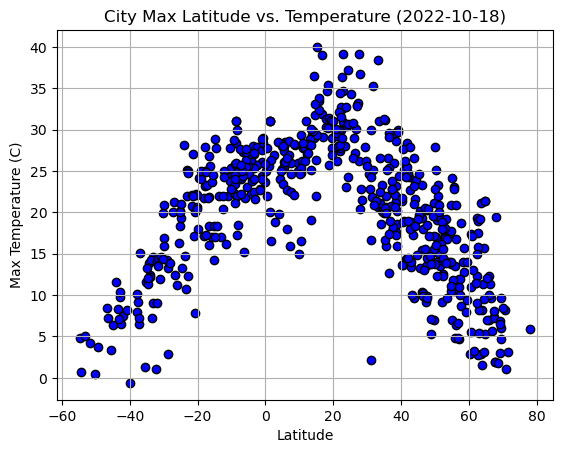

In [16]:
# Build scatter plot for latitude vs. temperature
x_values= city_data_df["Lat"]
y_values= city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker='o', facecolor = 'blue', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

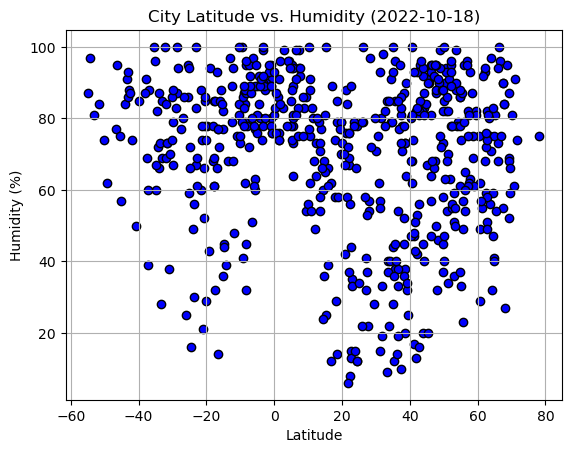

In [17]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker ='o', facecolor='blue', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

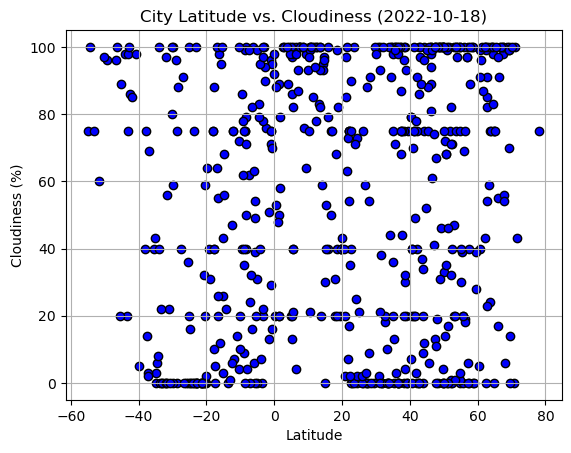

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]


plt.scatter(x_values, y_values, marker='o', facecolor='blue', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

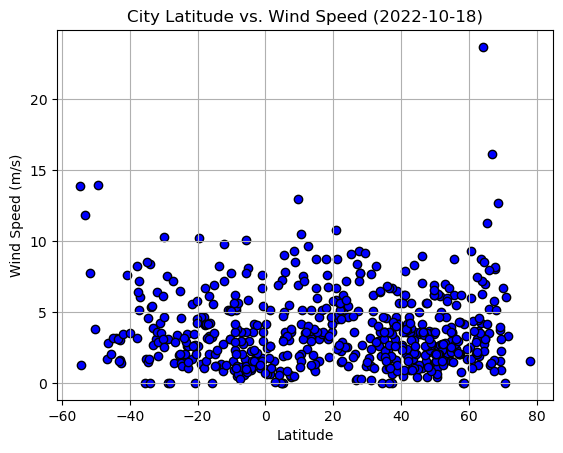

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_values= city_data_df["Lat"]
y_values=city_data_df["Wind Speed"]

plt.scatter(x_values, y_values, marker='o', facecolor='blue', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
from scipy import stats

def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_equation, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.grid()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dudinka,69.4058,86.1778,6.04,52,70,2.25,RU,2023-06-10 21:46:03
2,kumylzhenskaya,49.8809,42.5898,21.10,73,100,6.90,RU,2023-06-10 21:46:03
6,nha trang,12.2500,109.1833,27.00,73,100,2.36,VN,2023-06-10 21:41:55
7,aqadyr,48.2553,72.8483,13.80,46,0,3.68,KZ,2023-06-10 21:46:04
8,georgetown,5.4112,100.3354,27.97,78,40,3.09,MY,2023-06-10 21:41:22


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.57,84,98,3.13,NZ,2023-06-10 21:46:03
3,arraial do cabo,-22.9661,-42.0278,21.92,83,0,2.57,BR,2023-06-10 21:46:03
4,adamstown,-25.0660,-130.1015,20.20,59,100,6.49,PN,2023-06-10 21:46:03
5,manokwari,-0.8667,134.0833,26.03,80,71,1.07,ID,2023-06-10 21:46:04
9,funafuti,-8.5243,179.1942,31.00,84,75,5.14,TV,2023-06-10 21:46:04


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7358204535224948


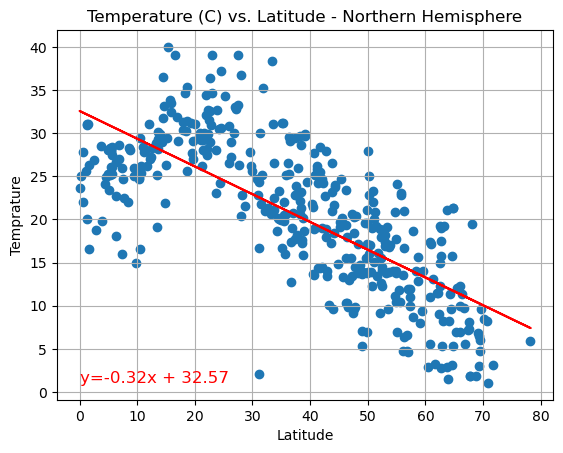

In [23]:
# Linear regression on Northern Hemisphere

# Extract latitude and temperature from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.title("Temperature (C) vs. Latitude - Northern Hemisphere")
plt.annotate(line_equation, (min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)
plt.grid()
plt.show()

The r-value is: 0.8529124680965176


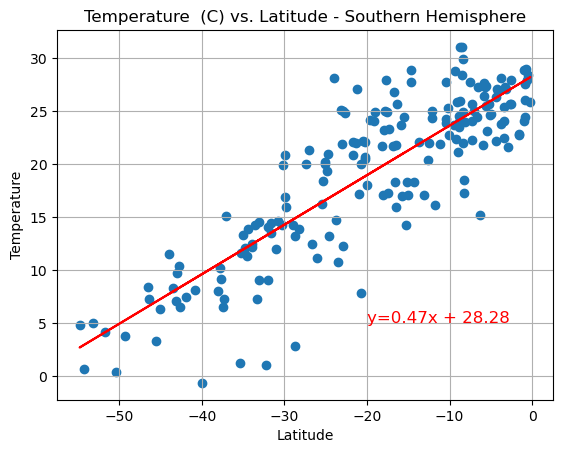

In [24]:
# Linear regression on Southern Hemisphere

# Extract latitude and temperature from the Northern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)=stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature  (C) vs. Latitude - Southern Hemisphere")
plt.annotate(line_equation, (-20,5), fontsize = 12, color = "red")
print("The r-value is:", rvalue)
plt.grid()
plt.show()

**Discussion about the linear relationship:** The linear relationship between temperature and latitude in the Northern Hemisphere is described by the equation y = -0.32x + 32.57, indicating a decreasing temperature as latitude increases. The intercept of 32.57 represents the expected temperature at the equator (latitude 0).

In the Southern Hemisphere, the linear relationship between temperature and latitude is given by the equation y = 0.47x + 28.28. This indicates that as latitude increases, the temperature tends to increase.The intercept of 28.21 represents the expected temperature at the equator (latitude 0) in the Southern Hemisphere.

These equations represent the general temperature patterns as we move away from the equator in each hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.005952979478834881


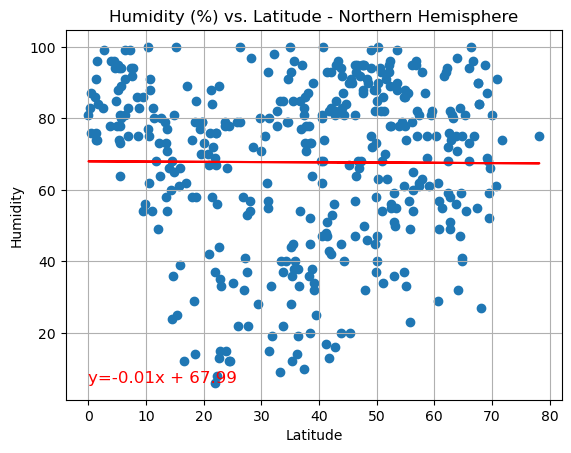

In [25]:
# Northern Hemisphere

# Extract latitude and Humidity from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity (%) vs. Latitude - Northern Hemisphere")
plt.annotate(line_equation,(min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)
plt.grid()
plt.show()

The r-value is: 0.09396772730020801


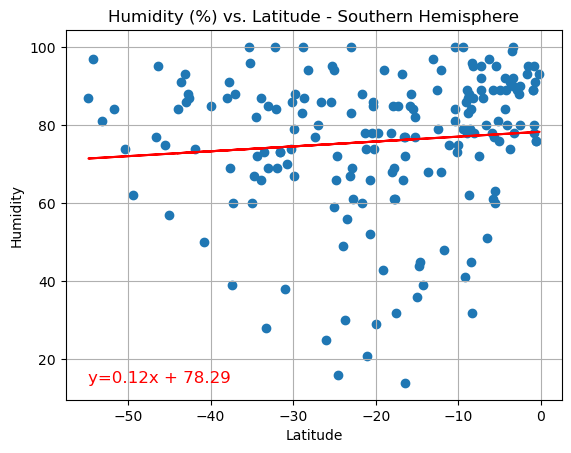

In [26]:
# Southern Hemisphere

# Extract latitude and Humidity from the Southern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity (%) vs. Latitude - Southern Hemisphere")
plt.annotate(line_equation, (min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)
plt.grid()
plt.show()

**Discussion about the linear relationship:** The linear relationship between humidity and latitude in the Northern Hemisphere is described by the equation y = -0.01x + 67.99, indicating a slight decrease in humidity as latitude increases.

In the Southern Hemisphere, the linear relationship between humidity and latitude is given by the equation y = 0.12x + 78.29, suggesting a very weak positive relationship between humidity and latitude.

The linear regression results indicate a weak correlation between humidity and latitude in both the Northern Hemisphere and the Southern Hemisphere. However, the correlation is very weak in both cases, indicating a minimal relationship between humidity and latitude that is not significant.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.032908857025641634


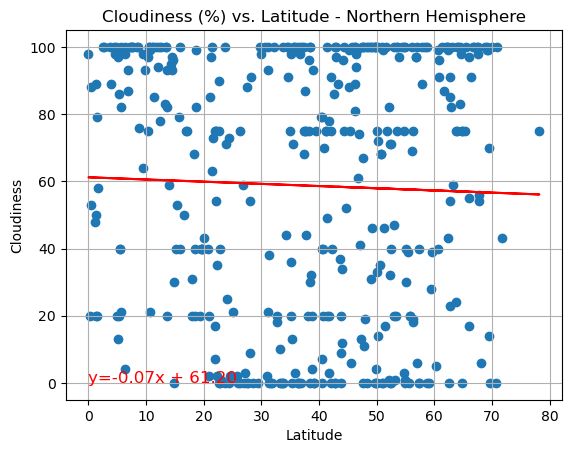

In [27]:
# Northern Hemisphere

# Extract latitude and Cloudiness from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness (%) vs. Latitude - Northern Hemisphere")
plt.annotate(line_equation,(min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)
plt.grid()
plt.show()

The r-value is: -0.0033298334361070198


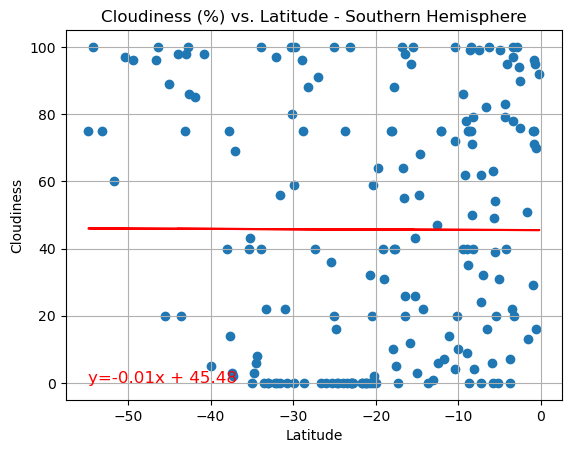

In [28]:
# Southern Hemisphere

# Extract latitude and Cloudiness from the Southern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness (%) vs. Latitude - Southern Hemisphere")
plt.annotate(line_equation, (min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)
plt.grid()
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, the linear regression analysis reveals a weak negative correlation between cloudiness and latitude, represented by the equation y = -0.07x + 61.20. This suggests a slight decrease in cloudiness as latitude increases.

On the other hand, the Southern Hemisphere, the equation y = -0.01x + 45.48 indicates a weak negative correlation between cloudiness and latitude. This means that as latitude increases, there is a slight increase in cloudiness. Although the correlation is weak, the equation suggests a nearly straight line relationship between cloudiness and latitude in the Southern Hemisphere.

Overall, the findings suggest a minor association between cloudiness and latitude, with the Southern Hemisphere showing a slightly stronger correlation compared to the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.019975623403043583


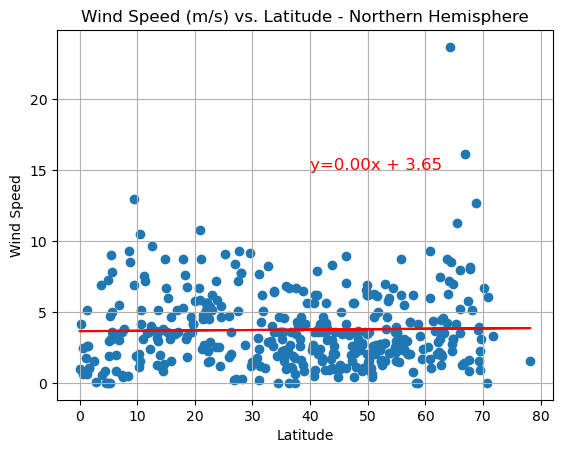

In [29]:
# Northern Hemisphere

# Extract latitude and Wind Speed from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (m/s) vs. Latitude - Northern Hemisphere")
plt.annotate(line_equation, (40,15), fontsize=12, color="red")
print("The r-value is:", rvalue)
plt.grid()
plt.show()

The r-value is: -0.2436612433764347


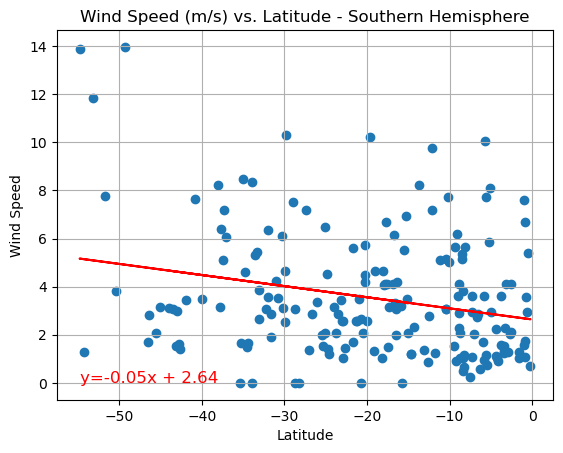

In [30]:
# Southern Hemisphere

# Extract latitude and Wind Speed from the Southern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr)= stats.linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept
line_equation = f"y={slope :.2f}x + {intercept :.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (m/s) vs. Latitude - Southern Hemisphere")
plt.annotate(line_equation, (min(x_values), min(y_values)), fontsize=12, color="red")
print("The r-value is:", rvalue)
plt.grid()
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, the linear regression analysis reveals a weak positive correlation between wind speed and latitude, as indicated by the equation y = 0.00x + 3.65. This suggests a slight increase in wind speed as latitude increases.

On the other hand, in the Southern Hemisphere, there is a weak negative correlation between wind speed and latitude, represented by the equation y = -0.05x + 2.64. This suggests a minor decrease in wind speed as latitude increases.

However, it's important to note that both correlations are extremely weak, indicating that there is almost no significant relationship between wind speed and latitude in both hemispheres.